In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import haversine as hs
from haversine import haversine, Unit
import random
import string
from datetime import datetime
from hurricaneModels import HurricaneModel
import xgboost as xgb
from sklearn import svm

## Pre-Processing

In [2]:
# Importing Data
data_folder = glob.glob('matToPyData/*.csv')
data_folder.sort()
data_list = []

for file in data_folder:
    print(file)
    df = pd.read_csv(file, header = None)
    df.drop(df.columns[3], inplace = True, axis = 1) # dropping fake numeric date
    data_list.append(df)



matToPyData/bestStormData_1.csv
matToPyData/bestStormData_2.csv
matToPyData/bestStormData_3.csv
matToPyData/bestStormData_4.csv
matToPyData/bestStormData_5.csv
matToPyData/bestStormData_6.csv
matToPyData/bestStormData_7.csv


In [3]:
# Importing Data Dates
dates_folder = glob.glob('matToPyDates/*.csv')
dates_folder.sort()
dates_list = []

for file in dates_folder:
    print(file)
    df = pd.read_csv(file, header = None)
    dates_list.append(df)

matToPyDates/bestStormDates_1.csv
matToPyDates/bestStormDates_2.csv
matToPyDates/bestStormDates_3.csv
matToPyDates/bestStormDates_4.csv
matToPyDates/bestStormDates_5.csv
matToPyDates/bestStormDates_6.csv
matToPyDates/bestStormDates_7.csv


In [4]:
# Feature Engineering 

random.seed(10)
final_data_list = []
for i in range(0, len(dates_list)):
    df = pd.concat([data_list[i], dates_list[i]], axis = 1)
    df.columns = ['lat', 'long', 'distance', 'azimuth', 'speed', 'cp', 'windspeed', 
                  'landfall_flag', 'overland_flag', 'maxwind', 'min_cp','rad_maxwind', 'eye_diam', 'pressure_isobar', 'rad_isobar' ,'date_time']
    #print(df.shape)
    
    df = df[df['lat'].between(-90,90)] # removing impossible long lat values
    df = df[df['long'].between(-180,180)]
    
    #print(df.shape)

    df['SID'] = random.choice(string.ascii_uppercase) + '_' + str(i + 1) #assigning IDs

    df['date_time'] = pd.to_datetime(df['date_time'])
    final_data_list.append(df)

In [5]:
def haversine(lat1, lat2, lon1, lon2):
    p1 = (lat1, lon1)
    p2 = (lat2, lon2)
    return hs.haversine(p1, p2)

# Adding between point distance as a feature
for data in final_data_list:
    data.loc[0, 'derived_distance'] = 0
    for i in range(1, len(data)):
        data.loc[i, 'derived_distance'] = haversine(data.iloc[i-1, :]['lat'], 
                                                     data.iloc[i, :]['lat'], 
                                                     data.iloc[i-1, :]['long'], 
                                                     data.iloc[i, :]['long'])

## Analysis

['S_1'] MSE: 8100.369214204723 MAE: 81.028270111965 MAPE: 88.44927314896273
['B_2'] MSE: 2188.112843543345 MAE: 35.083135245391105 MAPE: 27.332376594565726
['N_3'] MSE: 3773.7751346024197 MAE: 54.371295655102315 MAPE: 42.24177288559748
['P_4'] MSE: 1763.7759878084687 MAE: 39.70502482040532 MAPE: 25.42312303291771
['S_5'] MSE: 967.1392652760512 MAE: 26.70684010517166 MAPE: 23.926373442966174
['A_6'] MSE: 460.668963161593 MAE: 16.4620364738646 MAPE: 13.205772416920144
['G_7'] MSE: 393.77122818150275 MAE: 16.370087798676266 MAPE: 16.6571230734625


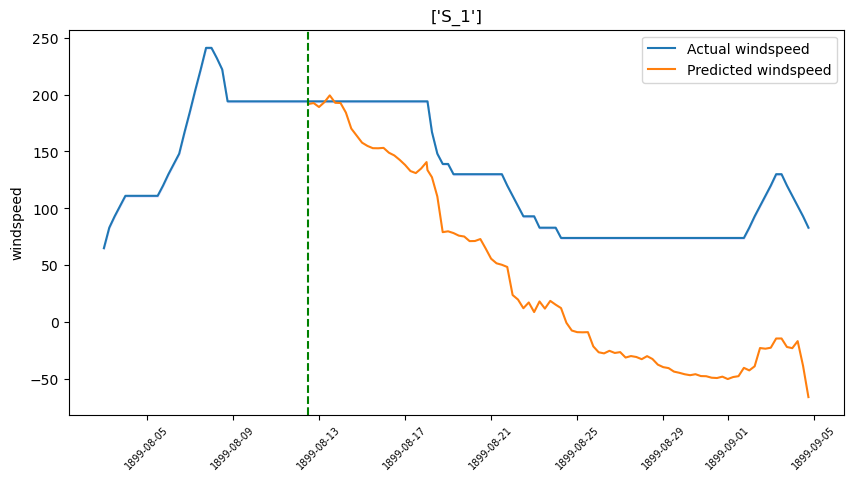

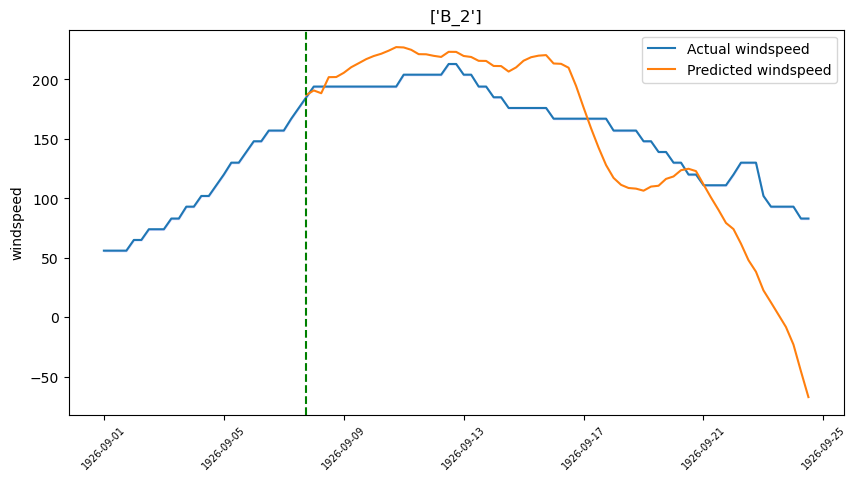

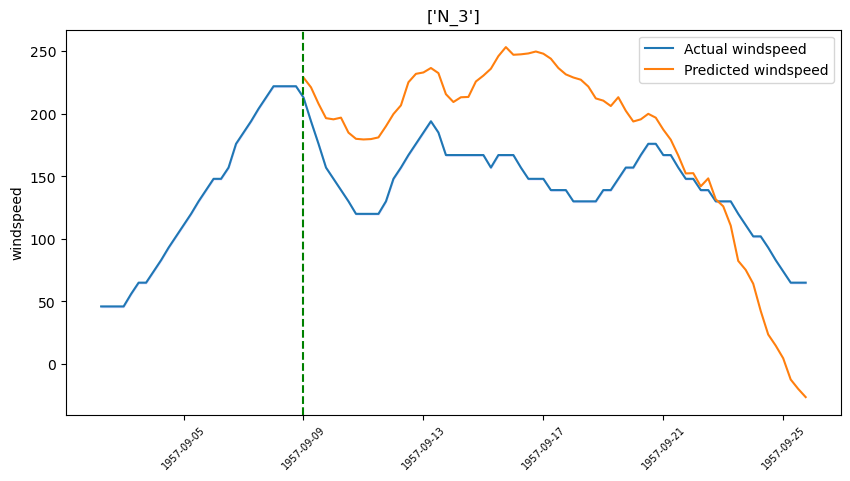

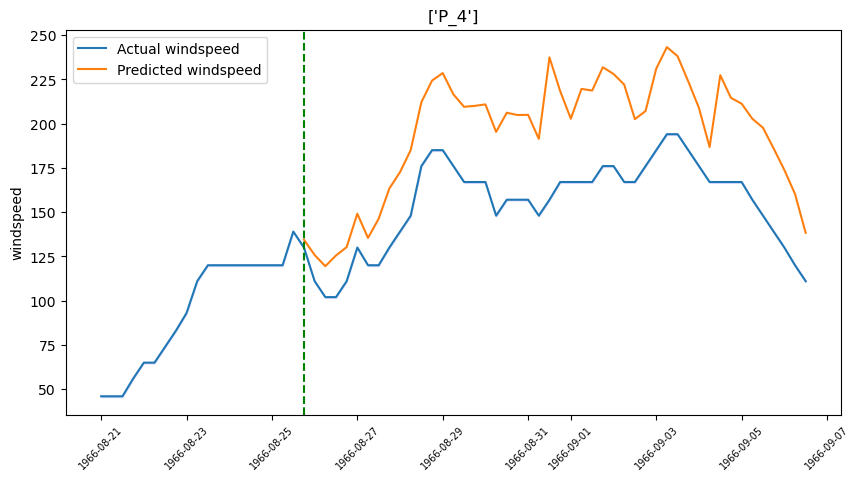

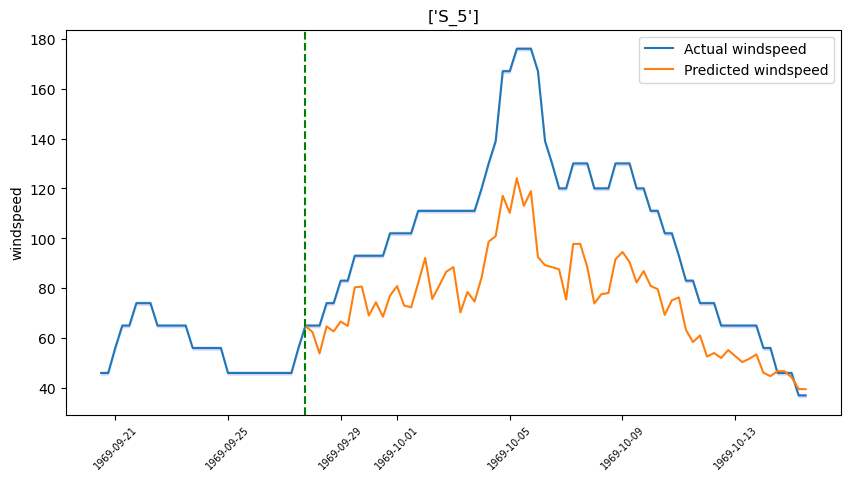

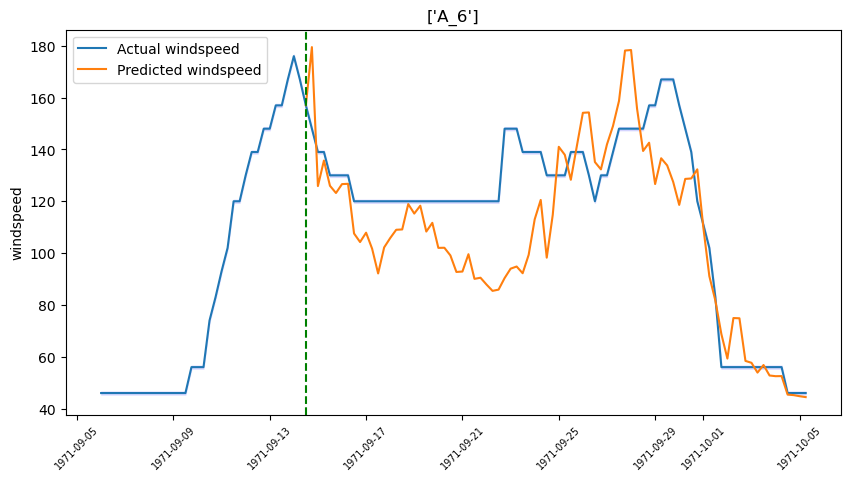

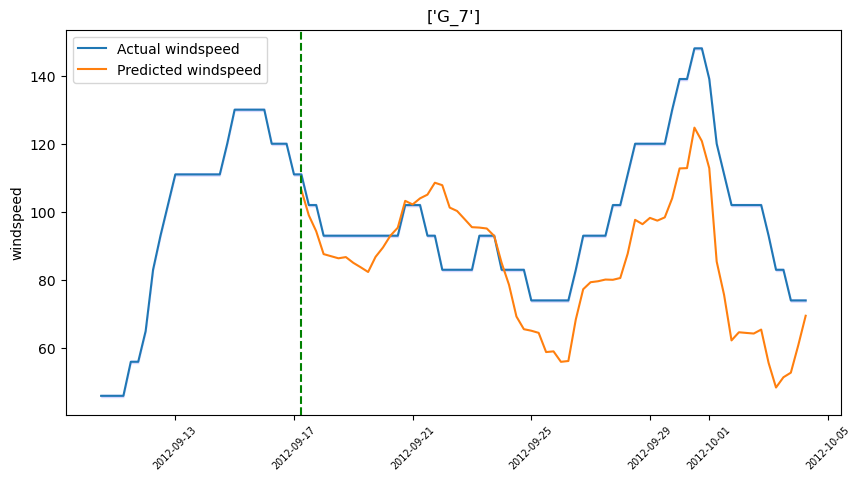

In [6]:
feats = ['lat', 'long', 'speed', 'cp', 'derived_distance']
target = 'windspeed'
ratio = 0.3

model1 = xgb.XGBRegressor(n_estimators = 100)
model2 = svm.SVR(kernel = 'linear')

for data in final_data_list:
    Hmodel = HurricaneModel(model2, data)
    Hmodel.split_train_predict(ratio, feats, target, True)
    #Hmodel.plotPACF(target)

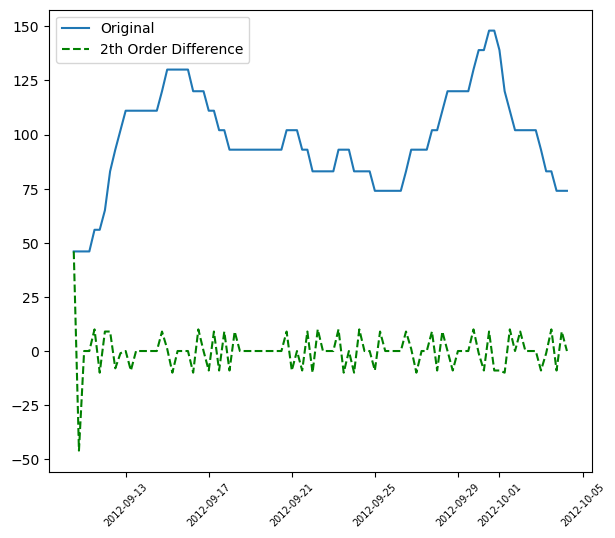

In [7]:
diffed_data = Hmodel.plotDiff('windspeed', order = 2)